# League of Legends 2024
## About the Data

1. Name / Title: League of Legends Champions 2024
2. Link to Data: https://www.kaggle.com/datasets/marwant1/league-of-legends-champions-2024
3. Source / Origin: 
	* Author or Creator: `Muhammad Abdullah`
	* Publication Date: 09/06/2024
	* Publisher: `Muhammad Abdullah`
	* Version or Data Accessed: 09/30/2024
4. License: CC0: Public Domain
5. Can You Use this Data Set for Your Intended Use Case? Yes, I can.

## About Dataset
The League of Legends Champions 2024 dataset contains detailed information about each champion in the popular online multiplayer game, League of Legends, as of 2024. This dataset is designed for players, analysts, and developers who seek to understand champion characteristics, their roles in gameplay, and their overall mechanics.

### Key Features:
* `Name`: The official name of the champion as recognized in the game.
* `Nick Name`: The colloquial or commonly used name for the champion, often based on their lore or gameplay style.
* `Classes`: The classification of the champion, indicating their primary traits, such as Fighter, Mage, Marksman, Tank, Support, etc.
* `Release Date`: The date when the champion was first introduced to the game, providing context on their availability and relevance within the game’s evolving meta.
* `Last Changed`: The most recent date when the champion underwent any significant balance changes or updates, reflecting their current state in the game.
* `Blue Essence`: The in-game currency required to unlock the champion, representing their accessibility for players.
* `RP (Riot Points)`: The premium currency price to purchase the champion, indicating the monetary value of the champion for players who prefer to buy rather than earn them.
* `Difficulty`: A rating that indicates how challenging the champion is to play, helping players assess suitability based on their skill level.
* `Role`: The designated gameplay role of the champion, such as Top, Jungle, Mid, ADC (Attack Damage Carry), or Support, which influences team composition and strategy.
* `Range Type`: Specifies whether the champion is melee or ranged, affecting their playstyle and engagement strategies in matches.
* `Resource Type`: The type of resource the champion uses to cast abilities, such as Health, Mana, or Energy, influencing their gameplay mechanics and sustainability.
* `Base HP`: The initial health points of the champion at level one, impacting their survivability in the early game.
* `Base Mana`: The initial mana points of the champion at level one, determining their capacity to cast spells in the early game.

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

### Take a glance on what the data looks like.
* Checking missing value
* Checking data type
* Checking duplicated columns

In [315]:
lol = pd.read_csv('/Users/itsnotjerryh/MyDirectory/League_2024/League of legend Champions 2024.csv')
lol.head()

Name            Nick Name             Classes Release Date Last Changed  \
0   Aatrox     The darkin blade          Juggernaut   2013-06-13       V14.14   
1     Ahri  The nine-tailed fox               Burst   2011-12-14       V14.18   
2    Akali   The rogue assassin            Assassin   2010-05-11       V14.18   
3   Akshan   The rogue sentinel  Marksman  Assassin   2021-07-22       V14.14   
4  Alistar         The minotaur            Vanguard   2009-02-21       V14.16   

   Blue Essence   RP         Difficulty        Role Range type Resourse type  \
0          4800  880           Advanced         Top      Melee    Blood Well   
1          3150  790       Intermediate      Middle     Ranged          Mana   
2          3150  790             Expert  Top,Middle      Melee        Energy   
3          4800  880  Intermediate_Plus      Middle     Ranged          Mana   
4          1350  585             Novice     Support      Melee          Mana   

   Base HP  Base mana  
0      650          0  
1      590        418  
2      600        200  
3      630        350  
4      685        350

In [317]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           168 non-null    object
 1   Nick Name      168 non-null    object
 2   Classes        168 non-null    object
 3   Release Date   168 non-null    object
 4   Last Changed   168 non-null    object
 5   Blue Essence   168 non-null    int64 
 6   RP             168 non-null    int64 
 7   Difficulty     168 non-null    object
 8   Role           168 non-null    object
 9   Range type     168 non-null    object
 10  Resourse type  168 non-null    object
 11  Base HP        168 non-null    int64 
 12  Base mana      168 non-null    int64 
dtypes: int64(4), object(9)
memory usage: 17.2+ KB


In [319]:
lol.isna().sum()

Name             0
Nick Name        0
Classes          0
Release Date     0
Last Changed     0
Blue Essence     0
RP               0
Difficulty       0
Role             0
Range type       0
Resourse type    0
Base HP          0
Base mana        0
dtype: int64

### Data Cleaning:
* Type conversion
* Fixing data

In [324]:
# Get Release Year
lol['Release Date'] = pd.to_datetime(lol['Release Date'], errors='coerce')
lol.loc[lol['Name'] == 'Zyra', 'Release Date'] = pd.Timestamp('2012-07-24') # Need to fix this row, the original data has some issue here
lol['Release Year'] = lol['Release Date'].dt.year
lol.drop(columns=['Release Date'], inplace=True)
lol.drop(columns=['Nick Name'], inplace=True)

In [326]:
# Separate the categorical and numerical column
cate_col = [col for col in lol.columns if lol[col].dtype=='object' if col != 'Name']
num_col = [col for col in lol.columns if lol[col].dtype!='object']

## EDA
* Univariate Analysis
* Bivariate Analysis

### Univariate Analysis

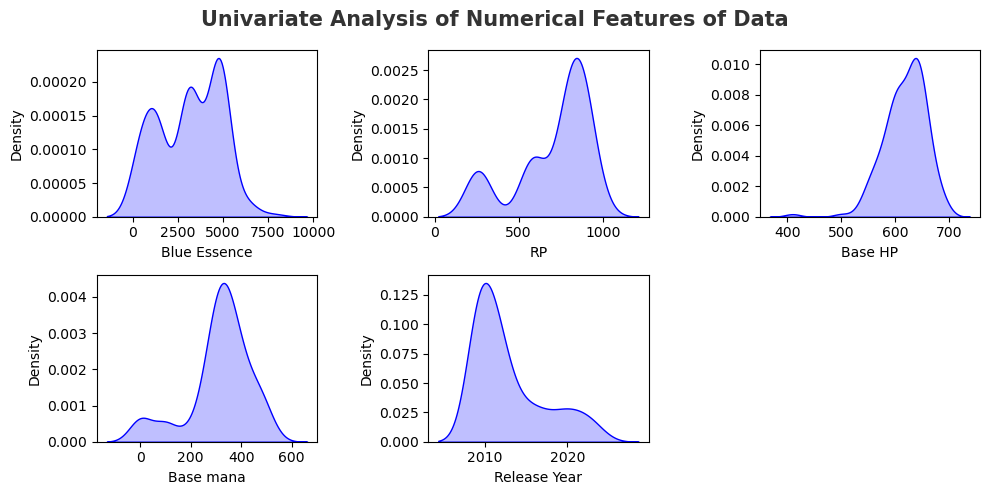

In [128]:
# Proportion of data distribution for numerical data
plt.figure(figsize=(10, 5))
plt.suptitle('Univariate Analysis of Numerical Features of Data', fontsize=15, fontweight='bold', alpha=0.8)

for i in range(0, len(num_col)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=lol[num_col[i]], fill=True, color='b')
    plt.xlabel(num_col[i])
plt.tight_layout()
plt.show()

In [321]:
lol['Classes'].value_counts()

Classes
Marksman                21
Vanguard                15
Diver                   15
Juggernaut              14
Specialist              14
Assassin                13
Skirmisher              13
Battlemage              11
Burst                   11
Enchanter                8
Catcher                  7
Artillery                5
Warden                   5
Burst  Enchanter         2
Assassin  Diver          2
Mage  Assassin           1
Marksman  Catcher        1
Warden  Skirmisher       1
Marksman  Assassin       1
Burst  Artillery         1
Burst  Catcher           1
Assassin  Catcher        1
Marksman  Enchanter      1
Burst  Skirmisher        1
Enchanter  Warden        1
Marksman  Artillery      1
Assassin  Skirmisher     1
Name: count, dtype: int64

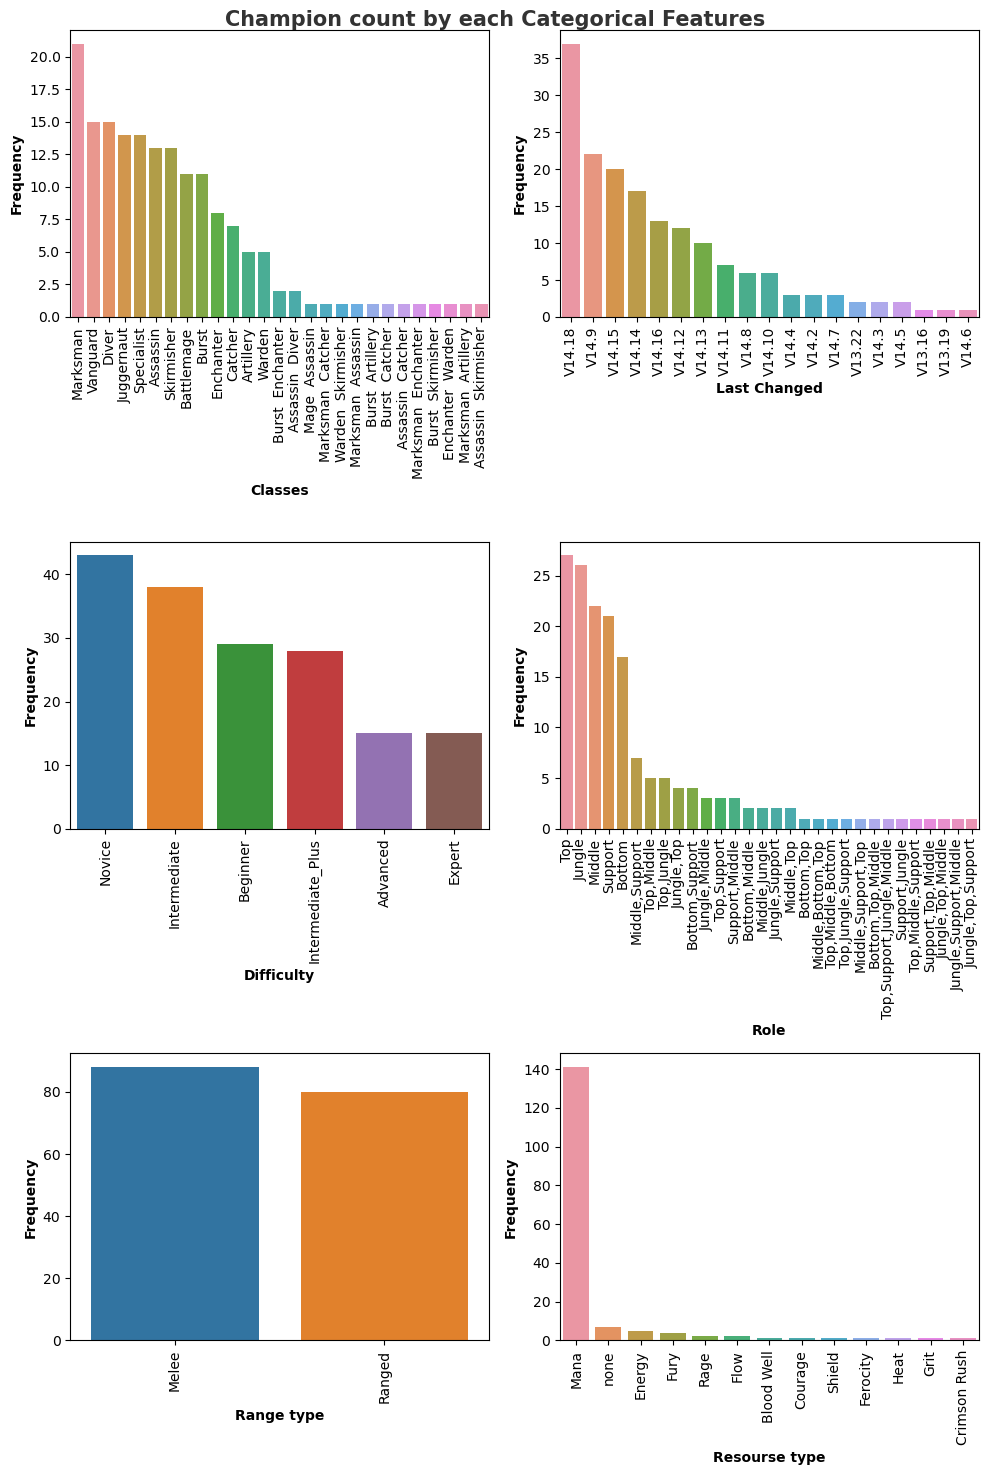

In [334]:
# categorical columns
plt.figure(figsize=(10,15))
plt.suptitle('Champion count by each Categorical Features', fontsize=15, fontweight='bold', alpha=0.8)

for i in range(0, len(cate_col)):
    
    plt.subplot(3, 2, i+1)
    temp_df=lol[cate_col[i]].value_counts()
    sns.barplot(x=temp_df.index,y=temp_df.values)
    plt.xlabel(cate_col[i], fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Bivariate Analysis

In [336]:
# Check the correlation between features
corr = lol[num_col].corr().round(2)

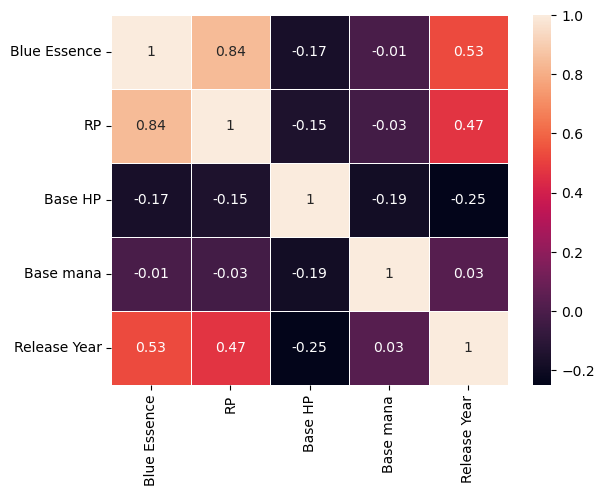

In [337]:
league = sns.heatmap(data=corr, annot=True, linewidth=.5)

In [338]:
num_col.remove('Release Year')
cate_col.append('Release Year')

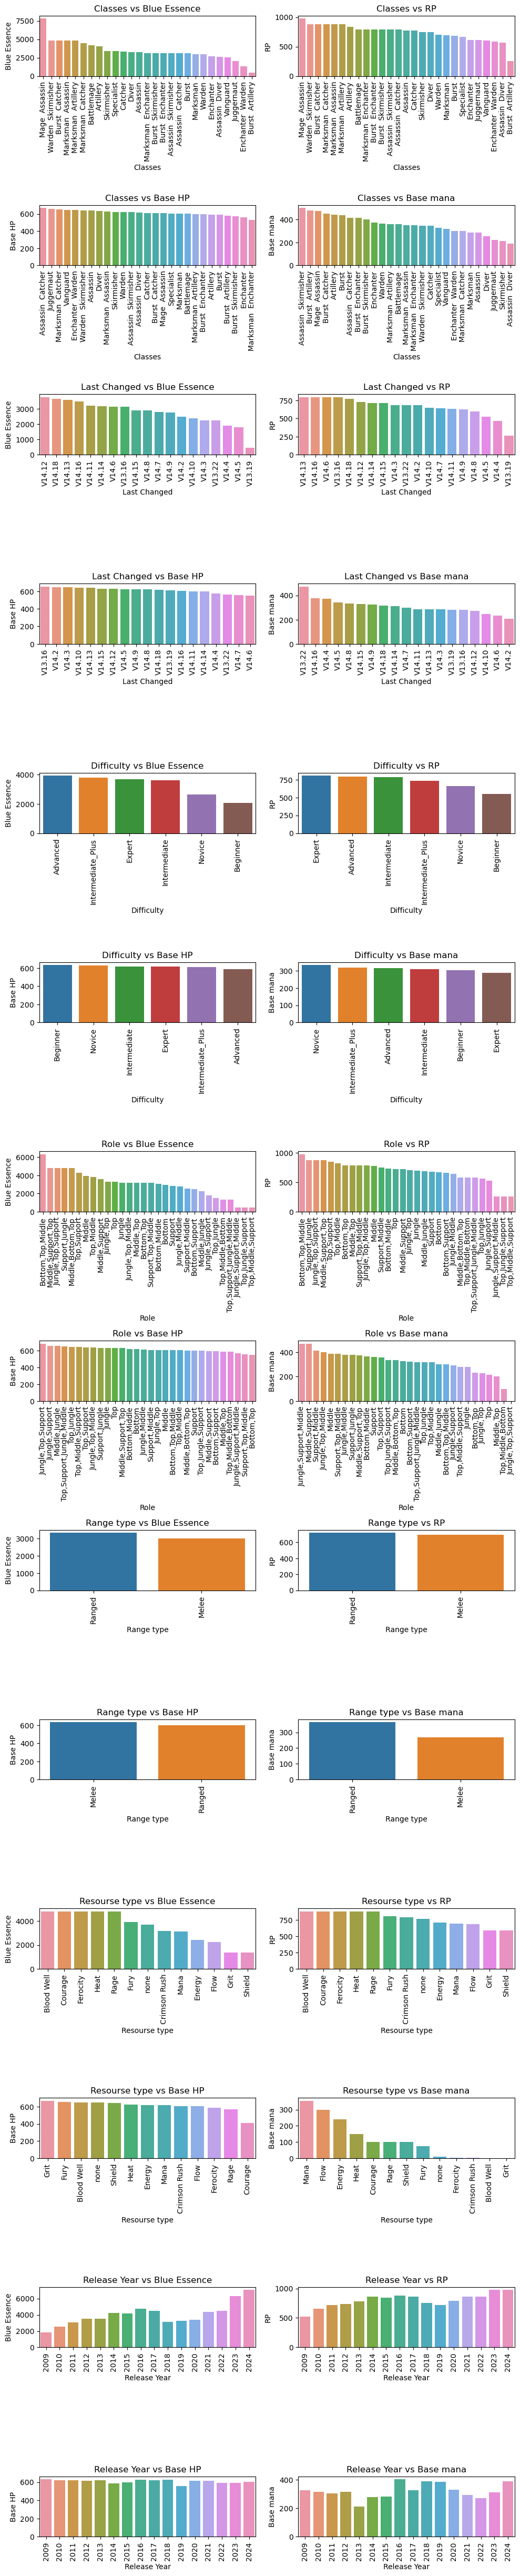

In [339]:
plt.figure(figsize=(10,70))
k=0
for i in cate_col:
    for j in num_col:
        plt.subplot(20, 2, k+1)
        plt.title(i + ' vs ' + j)
        temp_df = pd.DataFrame(lol.groupby([i])[j].mean()).reset_index()
        temp_df.sort_values(by=[j], ascending=False, inplace=True)
        sns.barplot(x=temp_df[i],y=temp_df[j])
        plt.xlabel(i)
        plt.ylabel(j)
        plt.xticks(rotation=90)
        k = k+1
plt.tight_layout() 

### Hypothesis Testing
* Kruskal-Wallis H-test
    * `Null hypothesis`: 
    * `Alternative hypothesis`:

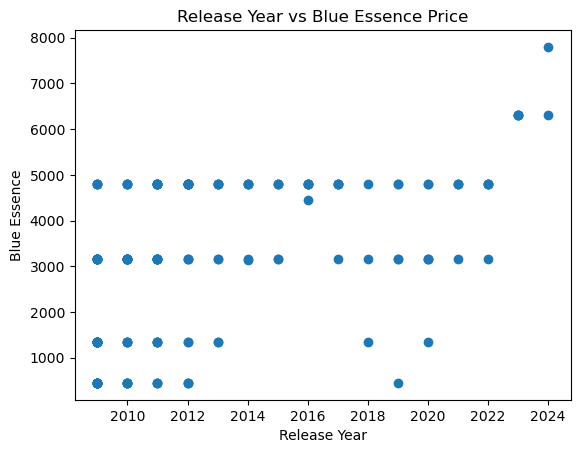

In [341]:
plt.scatter(lol['Release Year'], lol['Blue Essence'])
plt.xlabel('Release Year')
plt.ylabel('Blue Essence')
plt.title('Release Year vs Blue Essence Price')
plt.show()

In [342]:
import statsmodels.api as sm

X = sm.add_constant(lol['Release Year'])
y = lol['Blue Essence']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Blue Essence   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     64.67
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.59e-13
Time:                        14:26:06   Log-Likelihood:                -1463.1
No. Observations:                 168   AIC:                             2930.
Df Residuals:                     166   BIC:                             2937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.319e+05   5.41e+04     -7.983   